In [1]:
#do this later from admin: !python -m pip install --upgrade pip


# TOC

0. [Imports](#first-bullet)
1. [EDA](#1.0-bullet)
2. [Feature Engineering](#2.0-bullet)  
 2.1 [Pt 1 - Regression](#2.1-bullet)  
 2.2 [Pt 2 - Classification](#2.2-bullet)
3. [Basic Model](#3.0-bullet)  
 3.1 [Pt 1 - Regression](#3.1-bullet)  
 3.2 [Pt 2 - Classification](#3.2-bullet)
4. [Reference and Planning](#4.0-bullet)

Date Time
* General: publishedAt
* Friday (is_friday)
* Is weekend (is_weekend)
* week number (week)
* Month day (month_day)
* Month (month)
* 2 digit year number (year)

* Ignoring overall day count - possible overfit to search algorithm

Description
* Sentiment (description_sentiment)
* Overall word count (description_wordcount)
* CVEC (./data/engineered_data/description_wordvec.csv)


Tags
* Sentiment (tags_sentiment)
* Num tags (tags_wordcount)
* CVEC (./data/engineered_data/tag_wordvec.csv)

Title
* Sentiment (title_sentiment)
* Word count (title_wordcount)
* feat / ft. (title_featuring)
* Letter Count (intitle_ + a,b,c,...)
* String length (title_length)
* Which letters
* Length  
* CVEC (./data/engineered_data/title_wordvec.csv)

Ratios
* likes / views (lv_ratio)
* comments / view (comment_view_ratio)
* likes / dislikes (like_dislike_ratio)

Measures (includes log)
  * commentCount
  * dislikeCount 
  * favoriteCount 
  * likeCount: 
  * viewCount: view_log

Other
* Has content rating restriction (contentRating)
* Has any region Restriction (regionRestriction)
* Has captioned text (caption)
* Content has approved license (licensedContent)
* Duration of video (duration)
* High definition 1 or std (0) (definition)


In [2]:
#Basic
import pandas as pd
import numpy as np
#Math
import scipy as sp
from random import randint
from math import exp
import operator

#Scraping
import requests
import json

#Youtube Data API Packages: 
"""from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser
from googleapiclient.discovery import build
import argparse
from googleapiclient.errors import HttpError"""

#Modeling
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.cluster import KMeans
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

#NLP & Text Management
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
"""from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem import PorterStemmer"""

#Time analysis
import time
import datetime as dt
"""from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf"""

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [3]:
df_main = pd.read_csv('./data/engineered_data/data_engineered_10.9_2019.csv')

In [4]:
model_time = ['is_weekend', 'is_friday', 'year_day', 'week', 'week_day', 'month', 'month_day', 'year',  ]
model_text = ['description_sentiment', 'description_wordcount',
  'tags_sentiment', 'tags_wordcount', 'title_sentiment',
 'title_wordcount', 'title_featuring', 'title_length', ]
model_title_letter = ['intitle_a',  'intitle_b', 'intitle_c', 'intitle_d', 'intitle_e', 'intitle_f', 'intitle_g',
 'intitle_h', 'intitle_i', 'intitle_j', 'intitle_k', 'intitle_l', 'intitle_m', 'intitle_n', 'intitle_o',
 'intitle_p', 'intitle_q', 'intitle_r', 'intitle_s', 'intitle_t', 'intitle_u', 'intitle_v', 'intitle_w',
 'intitle_x', 'intitle_y', 'intitle_z',]              
model_ratios = ['lv_ratio', 'comment_view_ratio', 'like_dislike_ratio',]
model_other = ['duration', 'contentRating', 'regionRestriction',  'licensedContent', 'caption', 'definition']
measures = ['likeCount', 'dislikeCount', 'commentCount', 'viewCount',
            'view_log',  'comment_log',  'like_log', 'dislike_log', 
            'view_class' ]
non_model_cols = ['request_token', 'letter_search','channelTitle', 'tags', 'title', 'vidId','publishedAt','favoriteCount',
              'description','defaultLanguage', ]

# <a class="anchor" id="1.0-bullet"> 1. EDA</a>

# <a class="anchor" id="2.0-bullet"> 2. Feature Engineering</a>

## <a class="anchor" id="2.1-bullet">2.1 Adding Features</a>



## <a class="anchor" id="2.2-bullet">2.2 Classification</a>



# <a class="anchor" id="3.0-bullet"> 3. Basic Model</a>

## <a class="anchor" id="3.1-bullet">3.1 Regression</a>



In [6]:
df_main.columns

Index(['caption', 'channelTitle', 'commentCount', 'defaultLanguage',
       'definition', 'description', 'dislikeCount', 'duration',
       'favoriteCount', 'licensedContent', 'likeCount', 'publishedAt',
       'regionRestriction', 'tags', 'title', 'vidId', 'viewCount',
       'request_token', 'letter_search', 'contentRating', 'year', 'month',
       'month_day', 'year_day', 'week_day', 'view_log', 'comment_log',
       'like_log', 'dislike_log', 'view_class', 'week',
       'description_sentiment', 'description_wordcount', 'tags_sentiment',
       'tags_wordcount', 'title_sentiment', 'title_wordcount',
       'title_featuring', 'intitle_a', 'intitle_b', 'intitle_c', 'intitle_d',
       'intitle_e', 'intitle_f', 'intitle_g', 'intitle_h', 'intitle_i',
       'intitle_j', 'intitle_k', 'intitle_l', 'intitle_m', 'intitle_n',
       'intitle_o', 'intitle_p', 'intitle_q', 'intitle_r', 'intitle_s',
       'intitle_t', 'intitle_u', 'intitle_v', 'intitle_w', 'intitle_x',
       'intitle_y', 'in

In [56]:
cols_alphabet = ['intitle_a', 'intitle_d', 'intitle_f', 'intitle_g', 'intitle_i', 
                 'intitle_k', 'intitle_l','intitle_p','intitle_v','intitle_x','intitle_y' ]
cols_exclude = ['year_day', 'month', 'tags_sentiment','title_sentiment', 'title_wordcount' , ]
cols_include_initial = [col for col in df_main.columns if \
(col in model_time or \
col in model_text or \
col in cols_alphabet or \
col in model_ratios or \
col in model_other) and \
col not in cols_exclude]

#'lv_ratio','comment_view_ratio' take this between .85 and .9

In [57]:
df_formodel = df_main
df_formodel = df_formodel[df_formodel['view_class']>1]

In [58]:
y = df_formodel.view_log
X = df_formodel.loc[:, cols_include_initial]
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

model = GradientBoostingRegressor()
model.fit(X_train_sc, y_train)
    #return model, X_test_sc, y_test, ss

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [59]:
#model, X_test_sc, y_test, ss = test_model()
model.score(X_test_sc, y_test)

0.9068004751726582

In [19]:
paramz = {
    'n_estimators': [180, 225], 
    'subsample' : [.9, .8, .7],
    'max_depth': [3, 5, 7]
}
gs = GridSearchCV(GradientBoostingRegressor(), param_grid=paramz)
gs.fit(X_train_sc, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [180, 225], 'subsample': [0.9, 0.8, 0.7], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
gs.score(X_test_sc, y_test)
#Score to beat: .5412844284274065 with best params:
#{'max_depth': 3, 'n_estimators': 180, 'subsample': 0.9}

0.9141159095682608

In [ ]:
gs.best_params_

In [ ]:
df_residuals = pd.DataFrame(y_test)

df_residuals['predicted'] = gs.predict(X_test_sc)
df_residuals['residuals'] = df_residuals.predicted - df_residuals.view_log 

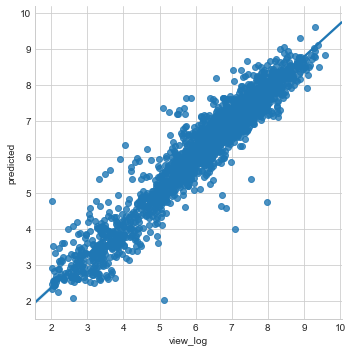

In [69]:
sns.lmplot('view_log', 'predicted', data=df_residuals)

In [70]:
outliers = list(df_residuals.sort_values(by='residuals').iloc[:7, :].index)

In [74]:
temp = df_main

In [78]:
outliers_df = df_residuals.sort_values(by='residuals').iloc[:7, :].loc[:, ['predicted', 'residuals']]

In [80]:
temp.join(outliers_df, how='right').loc[:, ['title', 'view_log', 'predicted']]

,title,view_log,predicted
1754,Meiga e Abusada (Clipe Oficial) - Anitta,7.989248,4.737690
4712,Freaks'n'Beatz - We Are Back,5.131664,2.010735
7089,東方神起 / Stand by U,7.095374,4.004374
8418,Şimal - Z Raporu,6.843051,4.585274
5010,O Come to the Altar | Live | Elevation Worship,7.534772,5.374828
4792,Mi C Mi Bed N Miss U - Dexta Daps (Official Vi...,6.688778,4.629842
4571,Bossa n` Adele - Full Album! - The Sexiest Ele...,6.719950,4.922499


In [23]:
df_big = df_main[df_main.viewCount > 100000000]
df_big_ss = ss.transform(df_big.loc[:, cols_include_initial])

df_big['predicted'] = 10**gs.predict(df_big_ss)

#df_big.viewCount = df_big.viewCount.map(lambda x: '{:.6g}'.format(x))

df_big.loc[:, ['title', 'viewCount', 'predicted']].sort_values(by='viewCount', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,title,viewCount,predicted
7479,Luis Fonsi - Despacito ft. Daddy Yankee,5555912002,2.489287e+09
4268,Ed Sheeran - Shape of You [Official Video],3827104659,1.812437e+09
7190,Wiz Khalifa - See You Again ft. Charlie Puth [...,3788737518,6.790424e+08
5540,Mark Ronson - Uptown Funk ft. Bruno Mars,3256917992,1.278338e+09
3634,PSY - GANGNAM STYLE(강남스타일) M/V,3218413082,1.924939e+09
569,Justin Bieber - Sorry (PURPOSE : The Movement),3014897224,1.295505e+09
7417,Maroon 5 - Sugar,2756205542,9.598417e+08
7514,Taylor Swift - Shake It Off,2650920924,3.221417e+08
5506,Katy Perry - Roar (Official),2638406673,1.451664e+09
627,Enrique Iglesias - Bailando (Español) ft. Desc...,2582945265,5.393226e+08


## <a class="anchor" id="3.2-bullet">3.2 Neural Net</a>



In [82]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [91]:
model = Sequential()
#this does input and first activation
model.add(Dense(X_train_sc.shape[1], activation='relu', input_dim=X_train_sc.shape[1]))
model.add(Dropout(.5))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation=None)) #1 neuron
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=50, verbose=0)
preds = model.predict(X_test_sc)
print( 'score: ', r2_score(y_test, preds))

score:  0.7342118975759212


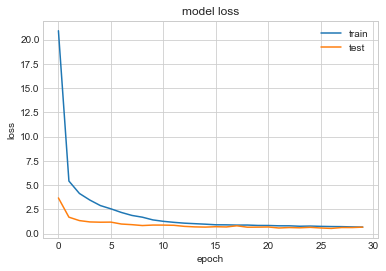

In [92]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show();

## <a class="anchor" id="3.3-bullet">3.3 Random Forrest</a>


In [93]:
model = RandomForestRegressor()
model.fit(X_train_sc, y_train)
model.score(X_test_sc, y_test)

0.8970721322012407

# <a class="anchor" id="4.0-bullet"> 4.0 Reference and Planning</a>

In [ ]:
# all views over 400M https://www.youtube.com/playlist?list=PLirAqAtl_h2r5g8xGajEwdXd3x1sZh8hC

Are there bots? would explain difference in like / view ratio.

### Next Steps
Feature engineering
* NLP - check only most 1000 common words according to corpus string (or above threshold) xx
* Comments / likes to views ratio? x

## Columns Decisions
* Convert 
 * Duration x
 * PublishedAt X
* Get dummies: 
 * definition, (0 for sd, 1 for hd)
 * licensedContent (map)
 * Caption (map)
* Drop:
 * Projection, 
 * Dimension
 * 3d movies,
 * livebroadcast
 * CategoryID
 * channelID (already have title, which has text!!)
 * LiveBroadCastContent
* Leave in for EDA, but anticipate dropping during most analysis (basically stuff that might be interesting)
 * Region restriction should be dropped until modeling - consider bringing this back later
 * ContentRating - insignificant but interesting
 * Could look at channelTitle
 * request_token
 * letter_search
 * defaultLanguage, (might be better as 1 / 0 for set / not set. leave for model)